In [1]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite
import ipywidgets as widgets
from IPython.display import display, clear_output

points2 = []

# Interactive function to update the plot and SVG export
def plot_joukowsky(R, x_center, y_center):
    clear_output(wait=True)

    # Number of points around the circle
    n_points = 400
    theta = np.linspace(0, 2 * np.pi, n_points)
    w = (x_center + R * np.cos(theta)) + 1j * (y_center + R * np.sin(theta))
    a = R
    z = w + (a**2) / w
    x = z.real
    y = z.imag

    # --- Plot using matplotlib ---
    fig, ax = plt.subplots()
    ax.plot(x, y, '-', linewidth=2)
    ax.set_aspect('equal', 'box')
    ax.set_title('Joukowsky Airfoil Profile')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.grid(True)
    plt.show()

    # --- Export to SVG ---
    svg_path = 'joukowsky_airfoil_profile.svg'
    dwg = svgwrite.Drawing(
        filename=svg_path,
        profile='tiny',
        size=('800px', '400px'),
        viewBox=f"{min(x):.2f} {min(y):.2f} {max(x)-min(x):.2f} {max(y)-min(y):.2f}"
    )

    points = list(zip(x.tolist(), y.tolist()))
    points2.append(points)
    dwg.add(dwg.polyline(points, stroke='black', fill='none', stroke_width=1))
    dwg.save()
    print(f"SVG exported to: {svg_path}")


# Create sliders
# R_slider = widgets.FloatSlider(value=0.74, min=-2.0, max=2.0, step=0.01, description='Radius R')
# x_slider = widgets.FloatSlider(value=-0.13, min=-1.0, max=1.0, step=0.01, description='x_center')
# y_slider = widgets.FloatSlider(value=0.48, min=-1.0, max=1.0, step=0.01, description='y_center')

R_slider = widgets.FloatSlider(value=0.85, min=-2.0, max=2.0, step=0.01, description='Radius R')
x_slider = widgets.FloatSlider(value=-0.1, min=-1.0, max=1.0, step=0.01, description='x_center')
y_slider = widgets.FloatSlider(value=0.23, min=-1.0, max=1.0, step=0.01, description='y_center')

# Display widgets and link to function
ui = widgets.VBox([R_slider, x_slider, y_slider])
out = widgets.interactive_output(plot_joukowsky, {
    'R': R_slider,
    'x_center': x_slider,
    'y_center': y_slider
})

display(ui, out)

Output()

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import numpy as np

# Shift the points by +10 in x and y and store in the same structure
shi = 0
shifted_points2 = [[(x + shi, y + shi) for x, y in segment] for segment in points2]

# Flatten for plotting (assuming one curve)
flat_points = shifted_points2[0]
x_vals = [pt[0] for pt in flat_points]
y_vals = [pt[1] for pt in flat_points]

# Slider-based interactive plot
def plot_up_to(i):
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals[:i], y_vals[:i], 'bo-', markersize=3)
    plt.xlim(min(x_vals) - 0.1, max(x_vals) + 0.1)
    plt.ylim(min(y_vals) - 0.1, max(y_vals) + 0.1)
    plt.title(f"Displaying {i} shifted points")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

interact(plot_up_to, i=IntSlider(min=1, max=len(flat_points), step=1, value=1))

interactive(children=(IntSlider(value=1, description='i', max=400, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_up_to(i)>

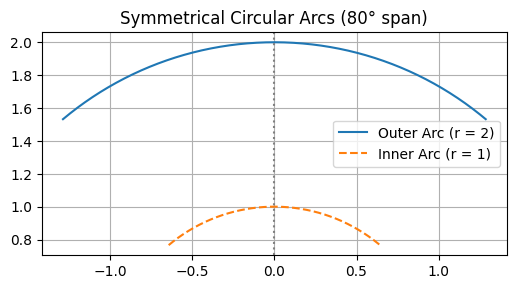

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
angle_deg = 80  # total angle of the arc
angle_rad = np.deg2rad(angle_deg)
half_angle = angle_rad / 2

# Radii
r_big = 2
r_small = 1

# Angles for the arcs (symmetrical with respect to y-axis)
theta = np.linspace(-half_angle, half_angle, 300)

# Outer arc
x_big = r_big * np.sin(theta)
y_big = r_big * np.cos(theta)

# Inner arc
x_small = r_small * np.sin(theta)
y_small = r_small * np.cos(theta)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x_big, y_big, label="Outer Arc (r = 2)")
plt.plot(x_small, y_small, label="Inner Arc (r = 1)", linestyle='--')
plt.axvline(0, color='gray', linestyle=':')
plt.gca().set_aspect('equal')
plt.title("Symmetrical Circular Arcs (80° span)")
plt.legend()
plt.grid(True)
plt.show()

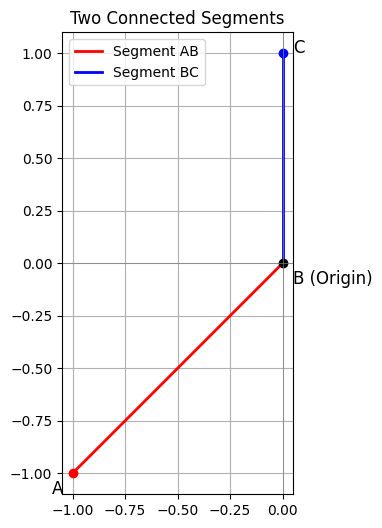

In [8]:
import matplotlib.pyplot as plt

# Define points
A = (-1, -1)
B = (0, 0)
C = (0, 1)

# Create plot
plt.figure(figsize=(6, 6))

# Draw segments
plt.plot([A[0], B[0]], [A[1], B[1]], 'r-', linewidth=2, label='Segment AB')
plt.plot([B[0], C[0]], [B[1], C[1]], 'b-', linewidth=2, label='Segment BC')

# Plot the points
plt.plot(*A, 'ro')  # Point A
plt.plot(*B, 'ko')  # Point B (origin)
plt.plot(*C, 'bo')  # Point C

# Annotate the points
plt.text(A[0]-0.1, A[1]-0.1, 'A', fontsize=12)
plt.text(B[0]+0.05, B[1]-0.1, 'B (Origin)', fontsize=12)
plt.text(C[0]+0.05, C[1], 'C', fontsize=12)

# Set grid and aspect
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Two Connected Segments")
plt.legend()
plt.show()

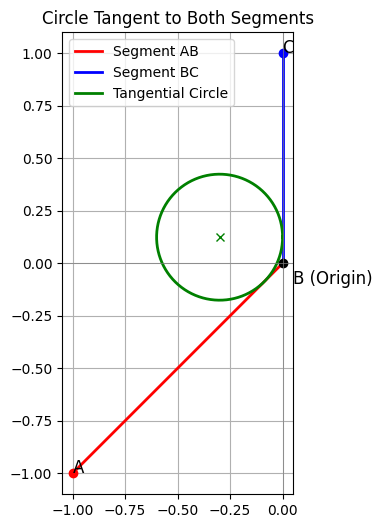

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define points
A = np.array([-1, -1])
B = np.array([0, 0])
C = np.array([0, 1])

# Unit vectors along segments
u = (A - B) / np.linalg.norm(A - B)
v = (C - B) / np.linalg.norm(C - B)

# Circle radius
R = 0.3

# Angle between segments
theta = np.arccos(np.clip(np.dot(u, v), -1, 1)) / 2  # half angle

# Direction of bisector
bisector = (u + v)
bisector = bisector / np.linalg.norm(bisector)

# Distance from corner to circle center
d = R / np.sin(theta)
circle_center = B + d * bisector

# Circle points
circle_theta = np.linspace(0, 2*np.pi, 100)
circle_x = circle_center[0] + R * np.cos(circle_theta)
circle_y = circle_center[1] + R * np.sin(circle_theta)

# Plot
plt.figure(figsize=(6, 6))
plt.plot([A[0], B[0]], [A[1], B[1]], 'r-', linewidth=2, label='Segment AB')
plt.plot([B[0], C[0]], [B[1], C[1]], 'b-', linewidth=2, label='Segment BC')
plt.plot(circle_x, circle_y, 'g-', linewidth=2, label='Tangential Circle')

# Points
plt.plot(*A, 'ro')
plt.plot(*B, 'ko')
plt.plot(*C, 'bo')
plt.plot(*circle_center, 'gx')  # mark center

# Labels
plt.text(*A, 'A', fontsize=12)
plt.text(B[0]+0.05, B[1]-0.1, 'B (Origin)', fontsize=12)
plt.text(*C, 'C', fontsize=12)

# Setup
plt.gca().set_aspect('equal', adjustable='box')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.title("Circle Tangent to Both Segments")
plt.legend()
plt.show()

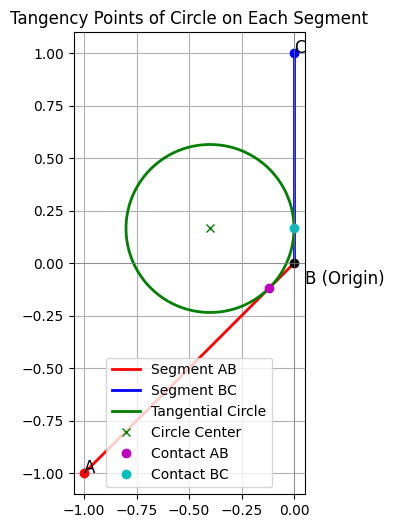

Point of contact on AB: [-0.11715729 -0.11715729]
Point of contact on BC: [0.         0.16568542]


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define points
A = np.array([-1, -1])
B = np.array([0, 0])
C = np.array([0, 1])

# Unit vectors along segments
u = (A - B) / np.linalg.norm(A - B)
v = (C - B) / np.linalg.norm(C - B)

# Circle radius
R = 0.4

# Angle between segments
theta = np.arccos(np.clip(np.dot(u, v), -1, 1)) / 2

# Direction of angle bisector
bisector = (u + v)
bisector /= np.linalg.norm(bisector)

# Circle center
d = R / np.sin(theta)
circle_center = B + d * bisector

# Tangent points are found by projecting the radius vector onto each direction
normal_to_AB = np.array([[0, -1], [1, 0]]) @ u  # rotate -90°
normal_to_BC = np.array([[0, 1], [-1, 0]]) @ v  # rotate +90°

contact_AB = circle_center + R * normal_to_AB
contact_BC = circle_center + R * normal_to_BC

# Circle points
circle_theta = np.linspace(0, 2*np.pi, 100)
circle_x = circle_center[0] + R * np.cos(circle_theta)
circle_y = circle_center[1] + R * np.sin(circle_theta)

# Plot
plt.figure(figsize=(6, 6))
plt.plot([A[0], B[0]], [A[1], B[1]], 'r-', linewidth=2, label='Segment AB')
plt.plot([B[0], C[0]], [B[1], C[1]], 'b-', linewidth=2, label='Segment BC')
plt.plot(circle_x, circle_y, 'g-', linewidth=2, label='Tangential Circle')

# Points
plt.plot(*A, 'ro')
plt.plot(*B, 'ko')
plt.plot(*C, 'bo')
plt.plot(*circle_center, 'gx', label='Circle Center')
plt.plot(*contact_AB, 'mo', label='Contact AB')
plt.plot(*contact_BC, 'co', label='Contact BC')

# Labels
plt.text(*A, 'A', fontsize=12)
plt.text(B[0]+0.05, B[1]-0.1, 'B (Origin)', fontsize=12)
plt.text(*C, 'C', fontsize=12)

# Setup
plt.gca().set_aspect('equal', adjustable='box')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.title("Tangency Points of Circle on Each Segment")
plt.legend()
plt.show()

# Print coordinates
print("Point of contact on AB:", contact_AB)
print("Point of contact on BC:", contact_BC)

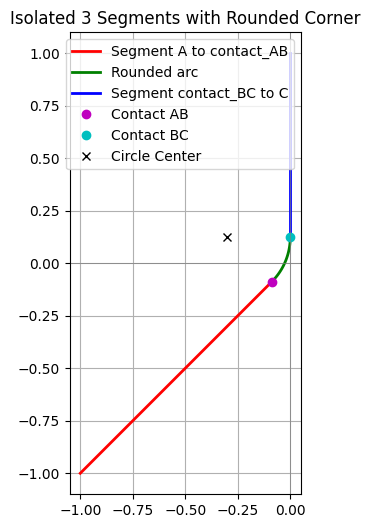

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define original points
A = np.array([-1, -1])
B = np.array([0, 0])
C = np.array([0, 1])

# Unit vectors along AB and BC
u = (A - B) / np.linalg.norm(A - B)
v = (C - B) / np.linalg.norm(C - B)

# Radius of the circle
R = 0.3
theta = np.arccos(np.clip(np.dot(u, v), -1, 1)) / 2

# Angle bisector
bisector = (u + v)
bisector /= np.linalg.norm(bisector)

# Center of circle
d = R / np.sin(theta)
circle_center = B + d * bisector

# Normals to get tangency points
normal_to_AB = np.array([[0, -1], [1, 0]]) @ u
normal_to_BC = np.array([[0, 1], [-1, 0]]) @ v

contact_AB = circle_center + R * normal_to_AB
contact_BC = circle_center + R * normal_to_BC

# Arc points between tangents
angle1 = np.arctan2(*(contact_AB - circle_center)[::-1])
angle2 = np.arctan2(*(contact_BC - circle_center)[::-1])

# Ensure the arc goes in the correct direction
if angle2 < angle1:
    angle2 += 2 * np.pi

arc_angles = np.linspace(angle1, angle2, 100)
arc_x = circle_center[0] + R * np.cos(arc_angles)
arc_y = circle_center[1] + R * np.sin(arc_angles)

# Plot only 3 segments
plt.figure(figsize=(6, 6))
plt.plot([A[0], contact_AB[0]], [A[1], contact_AB[1]], 'r-', linewidth=2, label='Segment A to contact_AB')
plt.plot(arc_x, arc_y, 'g-', linewidth=2, label='Rounded arc')
plt.plot([contact_BC[0], C[0]], [contact_BC[1], C[1]], 'b-', linewidth=2, label='Segment contact_BC to C')

# Optional: plot contact points and center
plt.plot(*contact_AB, 'mo', label='Contact AB')
plt.plot(*contact_BC, 'co', label='Contact BC')
plt.plot(*circle_center, 'kx', label='Circle Center')

# Set aspect and grid
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title("Isolated 3 Segments with Rounded Corner")
plt.legend()
plt.show()

In [14]:
import numpy as np
import svgwrite

# Define geometry (as in the previous code)
A = np.array([-1, -1])
B = np.array([0, 0])
C = np.array([0, 1])

u = (A - B) / np.linalg.norm(A - B)
v = (C - B) / np.linalg.norm(C - B)
R = 0.1
theta = np.arccos(np.clip(np.dot(u, v), -1, 1)) / 2
bisector = (u + v) / np.linalg.norm(u + v)
d = R / np.sin(theta)
circle_center = B + d * bisector
normal_to_AB = np.array([[0, -1], [1, 0]]) @ u
normal_to_BC = np.array([[0, 1], [-1, 0]]) @ v
contact_AB = circle_center + R * normal_to_AB
contact_BC = circle_center + R * normal_to_BC

# Arc
angle1 = np.arctan2(*(contact_AB - circle_center)[::-1])
angle2 = np.arctan2(*(contact_BC - circle_center)[::-1])
# Ensure the arc goes in the correct direction and covers the shorter angle
# Need to handle crossing the 0/2pi boundary correctly if necessary
# For this geometry, angle1 is -pi/4 (-0.785) and angle2 is 0, so no need to add 2pi
if angle2 < angle1:
    # This logic is generally correct, but for this specific geometry,
    # angle2 (0) is greater than angle1 (-0.785), so this block is skipped.
    # If angles were like 3.14 and 0.1, angle2 would need 2*pi added.
    angle2 += 2 * np.pi

arc_angles = np.linspace(angle1, angle2, 50)
arc_pts = np.column_stack((circle_center[0] + R * np.cos(arc_angles),
                           circle_center[1] + R * np.sin(arc_angles)))

# Combine all points for bounding box calculation
# Include B to ensure the origin is considered, although it's not part of the path
all_points = np.vstack([
    [A], # Start point A
    [contact_AB], # Start of arc
    arc_pts,      # Arc points
    [contact_BC], # End of arc
    [C]           # End point C
])

# SVG scaling and translation
min_x, min_y = np.min(all_points, axis=0)
max_x, max_y = np.max(all_points, axis=0)
margin = 0.1
width = max_x - min_x + 2 * margin
height = max_y - min_y + 2 * margin

# Create drawing
# Use the calculated width and height for size, but viewbox maps data coordinates
svg_path = "/content/drive/My Drive/SpinPAK_power_electronics/rounded_path.svg"
dwg = svgwrite.Drawing(svg_path, size=(f"{width*100:.2f}px", f"{height*100:.2f}px"), # Use scaled size for display
                       viewBox=f"{min_x - margin} {-(max_y + margin)} {width} {height}") # ViewBox in data coordinates, Y flipped

# Flip Y for SVG (SVG Y grows downward) and convert to standard floats
def to_svg_coords(p):
    # Convert numpy floats to standard floats explicitly
    return (float(p[0]), float(-p[1]))

# Draw segment A to contact_AB
dwg.add(dwg.line(start=to_svg_coords(A), end=to_svg_coords(contact_AB),
                 stroke='red', stroke_width=0.01)) # Use a small width for data coordinates

# Draw arc using polyline or lines
# A polyline is more efficient for a connected series of points
arc_svg_coords = [to_svg_coords(pt) for pt in arc_pts]
if arc_svg_coords: # Only add if arc_pts is not empty
    dwg.add(dwg.polyline(points=arc_svg_coords, stroke='green', fill='none', stroke_width=0.01))

# Draw segment contact_BC to C
dwg.add(dwg.line(start=to_svg_coords(contact_BC), end=to_svg_coords(C),
                 stroke='blue', stroke_width=0.01)) # Use a small width for data coordinates

# Save SVG
dwg.save()
print("✅ SVG saved as 'rounded_path.svg'")

# Optional: Display the SVG (requires IPython.display)
# from IPython.display import SVG, display
# display(SVG(filename="rounded_path.svg")) # Uncomment to display

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/SpinPAK_power_electronics/rounded_path.svg'

In [15]:
import numpy as np
import svgwrite

# Geometry setup (same as before)
A = np.array([-1, -1])
B = np.array([0, 0])
C = np.array([0, 1])

u = (A - B) / np.linalg.norm(A - B)
v = (C - B) / np.linalg.norm(C - B)
R = 0.1
theta = np.arccos(np.clip(np.dot(u, v), -1, 1)) / 2
bisector = (u + v) / np.linalg.norm(u + v)
d = R / np.sin(theta)
circle_center = B + d * bisector
normal_to_AB = np.array([[0, -1], [1, 0]]) @ u
normal_to_BC = np.array([[0, 1], [-1, 0]]) @ v
contact_AB = circle_center + R * normal_to_AB
contact_BC = circle_center + R * normal_to_BC

# Bounding box for viewBox
all_points = np.vstack([
    [A, contact_AB, contact_BC, C]
])
min_x, min_y = np.min(all_points, axis=0)
max_x, max_y = np.max(all_points, axis=0)
margin = 0.1
width = max_x - min_x + 2 * margin
height = max_y - min_y + 2 * margin

# Create SVG

dwg = svgwrite.Drawing("/content/drive/My Drive/SpinPAK_power_electronics/rounded_path_arc.svg", size=("400px", "400px"),
                       viewBox=f"{min_x - margin} {-(max_y + margin)} {width} {height}")

# Flip Y axis for SVG coordinates
def to_svg_coords(p):
    return (p[0], -p[1])

# Start building the path
path_data = [
    f"M {to_svg_coords(A)[0]} {to_svg_coords(A)[1]}",  # Move to A
    f"L {to_svg_coords(contact_AB)[0]} {to_svg_coords(contact_AB)[1]}",  # Line to contact_AB
    f"A {R} {R} 0 0 1 {to_svg_coords(contact_BC)[0]} {to_svg_coords(contact_BC)[1]}",  # Arc to contact_BC
    f"L {to_svg_coords(C)[0]} {to_svg_coords(C)[1]}"  # Line to C
]

# Add the path to the SVG
dwg.add(dwg.path(d=" ".join(path_data),
                 stroke="black", fill="none", stroke_width=0.01))

# Save
dwg.save()
print("✅ SVG saved as 'rounded_path_arc.svg'")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/SpinPAK_power_electronics/rounded_path_arc.svg'

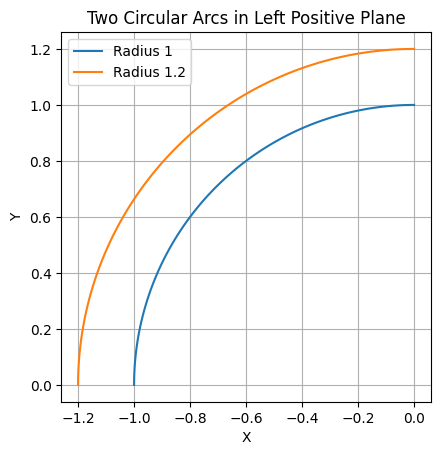

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define radii
radii = [1, 1.2]

# Define angle range for the left positive plane: 90° to 180° (in radians: pi/2 to pi)
theta = np.linspace(np.pi / 2, np.pi, 100)

# Create plot
fig, ax = plt.subplots()
for r in radii:
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, label=f"Radius {r}")

# Set aspect ratio and labels
ax.set_aspect('equal')
ax.set_title("Two Circular Arcs in Left Positive Plane")
ax.legend()
ax.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

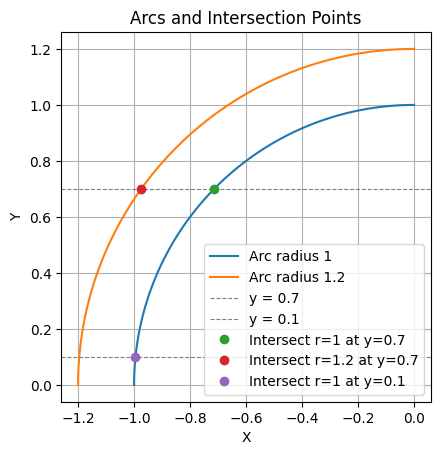

Intersection of r=1 at y=0.7: x = -0.7141, y = 0.7
Intersection of r=1.2 at y=0.7: x = -0.9747, y = 0.7
Intersection of r=1 at y=0.1: x = -0.9950, y = 0.1


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Radii
radii = [1, 1.2]
# Angle range for left positive plane (from 90° to 180°)
theta = np.linspace(np.pi / 2, np.pi, 100)

# Vertical lines
y_lines = [0.7, 0.1]

# Prepare plot
fig, ax = plt.subplots()

# Plot arcs
for r in radii:
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, label=f"Arc radius {r}")

# Plot vertical lines (horizontal lines here since y is fixed)
for y_val in y_lines:
    ax.axhline(y=y_val, color='gray', linestyle='--', linewidth=0.8, label=f"y = {y_val}")

# Calculate intersection points
def intersection_points(y_value, radius):
    if abs(y_value) > radius:
        return None  # No intersection
    x_value = -np.sqrt(radius**2 - y_value**2)
    return (x_value, y_value)

# Intersection points:
intersections = [
    ("r=1", 0.7, intersection_points(0.7, 1)),
    ("r=1.2", 0.7, intersection_points(0.7, 1.2)),
    ("r=1", 0.1, intersection_points(0.1, 1)),
]

# Plot intersection points
for label, y_val, point in intersections:
    if point:
        ax.plot(*point, 'o', label=f"Intersect {label} at y={y_val}")

# Final touches
ax.set_aspect('equal')
ax.set_title("Arcs and Intersection Points")
ax.grid(True)
ax.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Print the coordinates
for label, y_val, point in intersections:
    if point:
        print(f"Intersection of {label} at y={y_val}: x = {point[0]:.4f}, y = {point[1]}")
    else:
        print(f"No intersection for {label} at y={y_val}")

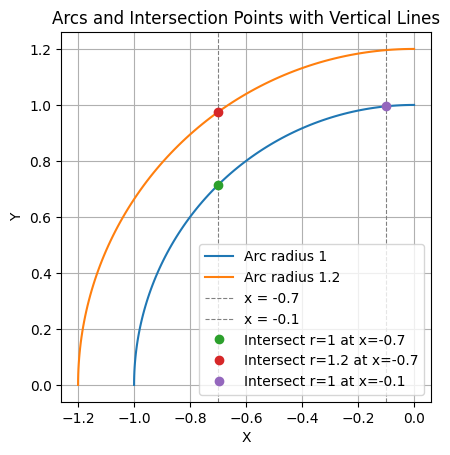

Intersection of r=1 at x=-0.7: x = -0.7000, y = 0.7141
Intersection of r=1.2 at x=-0.7: x = -0.7000, y = 0.9747
Intersection of r=1 at x=-0.1: x = -0.1000, y = 0.9950


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Radii
radii = [1, 1.2]
# Angle range for left positive plane (from 90° to 180°)
theta = np.linspace(np.pi / 2, np.pi, 100)

# Vertical lines
x_lines = [-0.7, -0.1]

# Prepare plot
fig, ax = plt.subplots()

# Plot arcs
for r in radii:
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, label=f"Arc radius {r}")

# Plot vertical lines
for x_val in x_lines:
    ax.axvline(x=x_val, color='gray', linestyle='--', linewidth=0.8, label=f"x = {x_val}")

# Calculate intersection points
def intersection_points(x_value, radius):
    if abs(x_value) > radius:
        return None  # No intersection
    y_value = np.sqrt(radius**2 - x_value**2)
    return (x_value, y_value)

# Intersection points:
intersections = [
    ("r=1", -0.7, intersection_points(-0.7, 1)),
    ("r=1.2", -0.7, intersection_points(-0.7, 1.2)),
    ("r=1", -0.1, intersection_points(-0.1, 1)),
]

# Plot intersection points
for label, x_val, point in intersections:
    if point:
        ax.plot(*point, 'o', label=f"Intersect {label} at x={x_val}")

# Final touches
ax.set_aspect('equal')
ax.set_title("Arcs and Intersection Points with Vertical Lines")
ax.grid(True)
ax.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Print the coordinates
for label, x_val, point in intersections:
    if point:
        print(f"Intersection of {label} at x={x_val}: x = {point[0]:.4f}, y = {point[1]:.4f}")
    else:
        print(f"No intersection for {label} at x={x_val}")

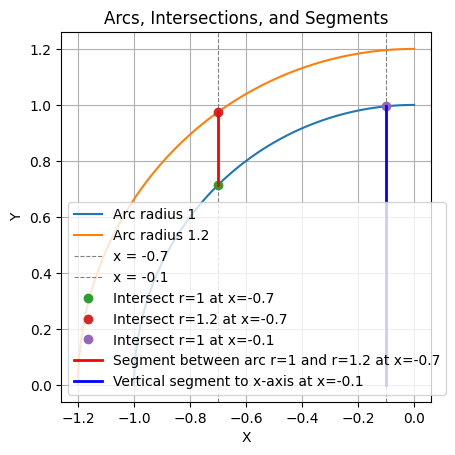

Intersection of r=1 at x=-0.7: x = -0.7000, y = 0.7141
Intersection of r=1.2 at x=-0.7: x = -0.7000, y = 0.9747
Intersection of r=1 at x=-0.1: x = -0.1000, y = 0.9950


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Radii
radii = [1, 1.2]
# Angle range for left positive plane (from 90° to 180°)
theta = np.linspace(np.pi / 2, np.pi, 100)

# Vertical lines
x_lines = [-0.7, -0.1]

# Prepare plot
fig, ax = plt.subplots()

# Plot arcs
for r in radii:
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, label=f"Arc radius {r}")

# Plot vertical lines
for x_val in x_lines:
    ax.axvline(x=x_val, color='gray', linestyle='--', linewidth=0.8, label=f"x = {x_val}")

# Calculate intersection points
def intersection_points(x_value, radius):
    if abs(x_value) > radius:
        return None  # No intersection
    y_value = np.sqrt(radius**2 - x_value**2)
    return (x_value, y_value)

# Intersection points:
p1 = intersection_points(-0.7, 1)
p2 = intersection_points(-0.7, 1.2)
p3 = intersection_points(-0.1, 1)

intersections = [
    ("r=1", -0.7, p1),
    ("r=1.2", -0.7, p2),
    ("r=1", -0.1, p3),
]

# Plot intersection points
for label, x_val, point in intersections:
    if point:
        ax.plot(*point, 'o', label=f"Intersect {label} at x={x_val}")

# Plot segment 1: between p1 and p2 (vertical)
if p1 and p2:
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-', linewidth=2, label="Segment between arc r=1 and r=1.2 at x=-0.7")

# Plot segment 2: from p3 down to x-axis
if p3:
    ax.plot([p3[0], p3[0]], [p3[1], 0], 'b-', linewidth=2, label="Vertical segment to x-axis at x=-0.1")

# Final touches
ax.set_aspect('equal')
ax.set_title("Arcs, Intersections, and Segments")
ax.grid(True)
ax.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Print the coordinates
for label, x_val, point in intersections:
    if point:
        print(f"Intersection of {label} at x={x_val}: x = {point[0]:.4f}, y = {point[1]:.4f}")
    else:
        print(f"No intersection for {label} at x={x_val}")

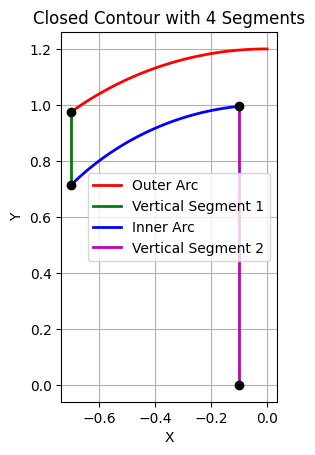

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Radii
r1 = 1
r2 = 1.2

# Points of intersection
p1 = (-0.7, np.sqrt(r1**2 - 0.7**2))   # Inner arc at x = -0.7
p2 = (-0.7, np.sqrt(r2**2 - 0.7**2))   # Outer arc at x = -0.7
p3 = (-0.1, np.sqrt(r1**2 - 0.1**2))   # Inner arc at x = -0.1
p4 = (-0.1, 0)                         # Bottom point on x-axis

# 1. Outer arc from y-axis (theta = π/2) to x = -0.7 on r=1.2
theta_outer = np.linspace(np.pi / 2, np.arccos(-0.7 / r2), 100)
arc1_x = r2 * np.cos(theta_outer)
arc1_y = r2 * np.sin(theta_outer)

# 2. Vertical segment from outer arc to inner arc at x = -0.7
seg2_x = [p2[0], p1[0]]
seg2_y = [p2[1], p1[1]]

# 3. Inner arc from x = -0.7 to x = -0.1 on r=1
theta_inner = np.linspace(np.arccos(-0.7 / r1), np.arccos(-0.1 / r1), 100)
arc3_x = r1 * np.cos(theta_inner)
arc3_y = r1 * np.sin(theta_inner)

# 4. Vertical segment from p3 down to x-axis
seg4_x = [p3[0], p4[0]]
seg4_y = [p3[1], p4[1]]

# Plot
fig, ax = plt.subplots()

# Segment 1: outer arc
ax.plot(arc1_x, arc1_y, 'r-', linewidth=2, label="Outer Arc")

# Segment 2: vertical connection at x=-0.7
ax.plot(seg2_x, seg2_y, 'g-', linewidth=2, label="Vertical Segment 1")

# Segment 3: inner arc
ax.plot(arc3_x, arc3_y, 'b-', linewidth=2, label="Inner Arc")

# Segment 4: vertical to x-axis
ax.plot(seg4_x, seg4_y, 'm-', linewidth=2, label="Vertical Segment 2")

# Mark intersection points
for pt in [p1, p2, p3, p4]:
    ax.plot(*pt, 'ko')

# Plot settings
ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Closed Contour with 4 Segments")
ax.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

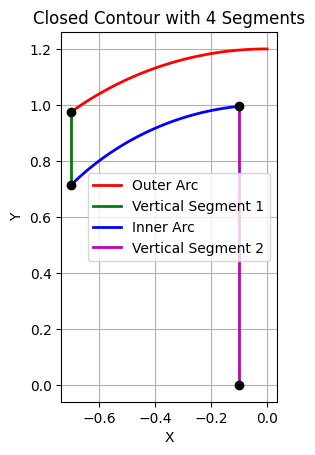

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/SpinPAK_power_electronics/segments.svg'

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import svgwrite

# Radii
r1 = 1
r2 = 1.2

# Points of intersection
p1 = (-0.7, np.sqrt(r1**2 - 0.7**2))
p2 = (-0.7, np.sqrt(r2**2 - 0.7**2))
p3 = (-0.1, np.sqrt(r1**2 - 0.1**2))
p4 = (-0.1, 0)

# 1. Outer arc points
theta_outer = np.linspace(np.pi / 2, np.arccos(-0.7 / r2), 100)
arc1_pts = [(r2 * np.cos(t), r2 * np.sin(t)) for t in theta_outer]

# 2. Vertical segment from outer to inner arc
seg2_pts = [p2, p1]

# 3. Inner arc points
theta_inner = np.linspace(np.arccos(-0.7 / r1), np.arccos(-0.1 / r1), 100)
arc3_pts = [(r1 * np.cos(t), r1 * np.sin(t)) for t in theta_inner]

# 4. Vertical segment down to x-axis
seg4_pts = [p3, p4]

# Combine all segments into one for SVG
all_points = arc1_pts + seg2_pts + arc3_pts + seg4_pts

# --- Plot ---
fig, ax = plt.subplots()

# Plot each segment
arc1_x, arc1_y = zip(*arc1_pts)
ax.plot(arc1_x, arc1_y, 'r-', linewidth=2, label="Outer Arc")

seg2_x, seg2_y = zip(*seg2_pts)
ax.plot(seg2_x, seg2_y, 'g-', linewidth=2, label="Vertical Segment 1")

arc3_x, arc3_y = zip(*arc3_pts)
ax.plot(arc3_x, arc3_y, 'b-', linewidth=2, label="Inner Arc")

seg4_x, seg4_y = zip(*seg4_pts)
ax.plot(seg4_x, seg4_y, 'm-', linewidth=2, label="Vertical Segment 2")

# Mark key points
for pt in [p1, p2, p3, p4]:
    ax.plot(*pt, 'ko')

ax.set_aspect('equal')
ax.grid(True)
ax.set_title("Closed Contour with 4 Segments")
ax.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# --- Export to SVG ---
dwg = svgwrite.Drawing("/content/drive/My Drive/SpinPAK_power_electronics/segments.svg", profile='tiny')

def to_svg_coords(p):
    scale = 300
    return (scale * (p[0] + 1.5), scale * (1.5 - p[1]))  # shift and flip Y

dwg.add(dwg.polyline([to_svg_coords(p) for p in all_points],
                     stroke='black', fill='none', stroke_width=2))
dwg.save()

# --- Segments now stored in the following variables ---
# arc1_pts, seg2_pts, arc3_pts, seg4_pts

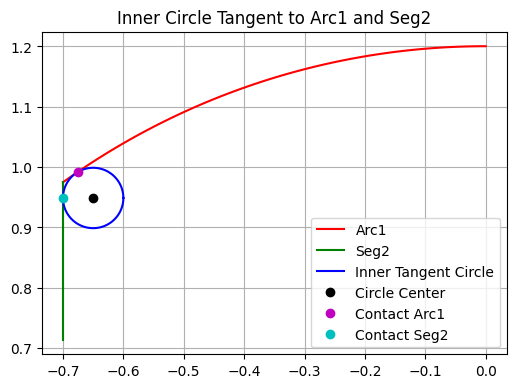

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize # Import the minimize function
from shapely.geometry import Point, LineString # Import Point and LineString for tangency calculations

# Circle radius
R = 0.05
arc_radius = 1.2  # r2 from original definition

# Define updated objective with inner bias
def objective_inner(center):
    cx, cy = center
    dists = []

    # Distance from center to segment (should be R)
    # Note: Using Shapely's distance method is more robust than the manual one for line segments
    line_segment = LineString(seg2_pts) # Define the line segment
    dist_seg = Point(center).distance(line_segment)
    dists.append((dist_seg - R)**2)

    # Distance from center to nearest arc point (should be R)
    d_arc = np.min(np.linalg.norm(np.array(arc1_pts) - center, axis=1)) # Convert arc1_pts to numpy array
    dists.append((d_arc - R)**2)

    # Penalty if outside the circle (more than arc radius from origin)
    origin_dist = np.linalg.norm(center)
    if origin_dist > arc_radius - R:
        dists.append(10 * (origin_dist - (arc_radius - R))**2)  # Strong penalty

    return sum(dists)

# Initial guess slightly inside
initial_guess = [-0.7 + R, 1.0]

res_inner = minimize(objective_inner, initial_guess, method='Nelder-Mead')
circle_center_inner = res_inner.x

# Compute tangency points
# Convert arc1_pts to numpy array before using np.argmin
arc1_pts_np = np.array(arc1_pts)
closest_arc_pt_inner = arc1_pts_np[np.argmin(np.linalg.norm(arc1_pts_np - circle_center_inner, axis=1))]

# Create the LineString object for seg2_pts before using it
line = LineString(seg2_pts)
closest_seg_pt_inner = np.array(line.interpolate(line.project(Point(circle_center_inner))).coords[0])


# Generate arc (circle)
# Need to define theta here or use a standard range if not defined in the environment
# Based on previous cells, theta is likely defined for the arc, but for the circle
# we typically want a full 360 range.
circle_theta = np.linspace(0, 2 * np.pi, 100)
circle_x_inner = circle_center_inner[0] + R * np.cos(circle_theta)
circle_y_inner = circle_center_inner[1] + R * np.sin(circle_theta)


# Plotting
fig, ax = plt.subplots(figsize=(6,6))
# Convert arc1_pts to numpy array for plotting
arc1_pts_np = np.array(arc1_pts)
ax.plot(arc1_pts_np[:,0], arc1_pts_np[:,1], 'r-', label="Arc1")
# Need to convert seg2_pts to a numpy array for plotting with slice indexing
ax.plot(np.array(seg2_pts)[:,0], np.array(seg2_pts)[:,1], 'g-', label="Seg2")
ax.plot(circle_x_inner, circle_y_inner, 'b-', label="Inner Tangent Circle")
ax.plot(*circle_center_inner, 'ko', label="Circle Center")
ax.plot(*closest_arc_pt_inner, 'mo', label="Contact Arc1")
ax.plot(*closest_seg_pt_inner, 'co', label="Contact Seg2")

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Inner Circle Tangent to Arc1 and Seg2")
plt.show()

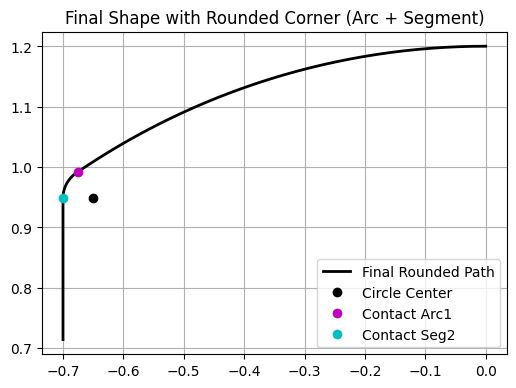

In [ ]:
# Compute angles for the connecting arc from contact point on arc1 to contact point on seg2
# Center and radius are already known: circle_center_inner and R

# Determine angles at which the arc starts and ends
vec_start = closest_arc_pt_inner - circle_center_inner
vec_end = closest_seg_pt_inner - circle_center_inner

angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])

# Ensure the arc goes counterclockwise from start to end
if angle_end < angle_start:
    angle_end += 2 * np.pi

arc_connection_theta = np.linspace(angle_start, angle_end, 100)
arc_connection = np.array([
    circle_center_inner + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta
])

# Trim arc1 before contact point
distances_arc = np.linalg.norm(arc1_pts - closest_arc_pt_inner, axis=1)
cut_index_arc = np.argmin(distances_arc)
arc1_trimmed = arc1_pts[:cut_index_arc + 1]

# Trim seg2 after contact point
distances_seg = np.linalg.norm(seg2_pts - closest_seg_pt_inner, axis=1)
# Check which segment point is further from the contact
seg_start = closest_seg_pt_inner
seg_end = seg2_pts[1]  # bottom point

# Combine final path: arc1_trimmed + rounded arc + trimmed segment
final_path = np.vstack([arc1_trimmed, arc_connection, [seg_end]])

# Plot
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(final_path[:,0], final_path[:,1], 'k-', linewidth=2, label="Final Rounded Path")
ax.plot(*circle_center_inner, 'ko', label="Circle Center")
ax.plot(*closest_arc_pt_inner, 'mo', label="Contact Arc1")
ax.plot(*closest_seg_pt_inner, 'co', label="Contact Seg2")

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Final Shape with Rounded Corner (Arc + Segment)")
plt.show()

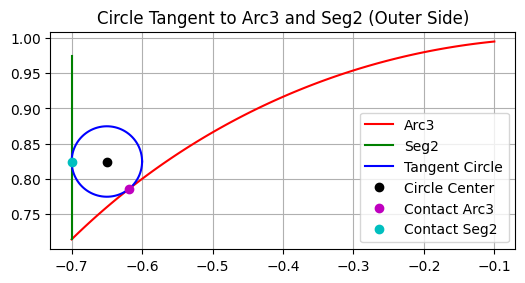

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point
from scipy.optimize import minimize


# Circle radius
R = 0.05

# Create shapely LineString for seg2
# Make sure seg2_pts is defined before this cell
# line_seg2 = LineString(seg2_pts) # This line might need to be moved or seg2_pts ensured from a previous cell

# Objective: place the circle tangent to arc3 and seg2, on the outside of arc3
def objective_outer_arc3(center):
    cx, cy = center
    dists = []

    # Distance to seg2
    x0, y0 = cx, cy
    # Ensure seg2_pts is accessible and is a list/array
    x1, y1 = seg2_pts[0]
    x2, y2 = seg2_pts[1]
    dx, dy = x2 - x1, y2 - y1
    norm = np.sqrt(dx*dx + dy*dy)
    # Avoid division by zero if seg2_pts represents a single point or identical points
    if norm == 0:
        dist_seg = np.linalg.norm(np.array(seg2_pts[0]) - center) - R # Distance from center to the point
    else:
        dist_seg = abs(dy * x0 - dx * y0 + x2*y1 - y2*x1) / norm
    dists.append((dist_seg - R)**2)

    # Distance to arc3 (should be R)
    # Convert arc3_pts to numpy array if it's a list
    arc3_pts_np = np.array(arc3_pts)
    d_arc = np.min(np.linalg.norm(arc3_pts_np - center, axis=1))
    dists.append((d_arc - R)**2)

    # Penalty if too close to the center (to force outside placement)
    origin_dist = np.linalg.norm(center)
    # Assuming r1 was the inner arc radius (1.0 from ipython-input-14-1f69c1804d77)
    if origin_dist < 1.0 + R:
         dists.append(1000 * (1.0 + R - origin_dist)**2) # Increased penalty for better convergence


    return sum(dists)

# Initial guess: slightly outside the arc3
initial_guess = [-0.65, 0.8]

res = minimize(objective_outer_arc3, initial_guess, method='Nelder-Mead')
circle_center_outer = res.x

# Compute contact points
# Convert arc3_pts to numpy array if it's a list
arc3_pts_np = np.array(arc3_pts)
closest_arc3_pt = arc3_pts_np[np.argmin(np.linalg.norm(arc3_pts_np - circle_center_outer, axis=1))]

# Ensure seg2_pts is a list of tuples or list of lists suitable for LineString
# Create shapely LineString for seg2 right before using it
line_seg2 = LineString(seg2_pts)
closest_seg2_pt = np.array(line_seg2.interpolate(line_seg2.project(Point(circle_center_outer))).coords[0])


# Plot circle
theta = np.linspace(0, 2*np.pi, 100)
circle_x = circle_center_outer[0] + R * np.cos(theta)
circle_y = circle_center_outer[1] + R * np.sin(theta)

# Plot all
fig, ax = plt.subplots(figsize=(6,6))

# Convert lists to numpy arrays for plotting
arc3_pts_np = np.array(arc3_pts)
seg2_pts_np = np.array(seg2_pts)

ax.plot(arc3_pts_np[:,0], arc3_pts_np[:,1], 'r-', label="Arc3")
ax.plot(seg2_pts_np[:,0], seg2_pts_np[:,1], 'g-', label="Seg2")
ax.plot(circle_x, circle_y, 'b-', label="Tangent Circle")
ax.plot(*circle_center_outer, 'ko', label="Circle Center")
ax.plot(*closest_arc3_pt, 'mo', label="Contact Arc3")
ax.plot(*closest_seg2_pt, 'co', label="Contact Seg2")

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Circle Tangent to Arc3 and Seg2 (Outer Side)")
plt.show()

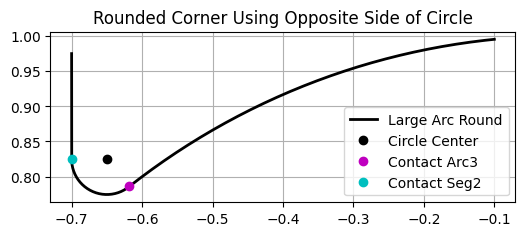

In [ ]:
# Use the other side of the trigonometric circle to reach angle_end from angle_start
# by extending the arc to go the long way around (more than 180 degrees)

vec_start = closest_seg2_pt - circle_center_outer
vec_end = closest_arc3_pt - circle_center_outer

angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])

# # Force the arc to go the long way around the circle (e.g., ~> 300 degrees)
# if angle_end > angle_start:
#     angle_end -= 2 * np.pi  # Make sure angle_end is behind start
# arc_connection_theta = np.linspace(angle_start, angle_end -2*np.pi, 200)  # Go full circle plus extra

# Ensure the arc goes clockwise
if angle_end < angle_start :
    angle_start -= 2 * np.pi

arc_connection_theta = np.linspace(angle_end, angle_start, 100)
arc_connection = np.array([
    circle_center_outer + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta
])

# Reuse previous trim: seg2 before contact, arc3 after contact
distances_arc3 = np.linalg.norm(arc3_pts_np - closest_arc3_pt, axis=1)
cut_index_arc3 = np.argmin(distances_arc3)
arc3_trimmed = arc3_pts_np[(cut_index_arc3):]
seg2_trimmed = [seg2_pts[0], closest_seg2_pt]
arc_connection_trimmed = arc_connection[:(len(arc_connection))]
arc_connection_trimmed = arc_connection_trimmed[::-1]

# Combine path
final_path_large_arc = np.vstack([ seg2_trimmed, arc_connection_trimmed , arc3_trimmed])

# Plot
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(final_path_large_arc[:,0], final_path_large_arc[:,1], 'k-', linewidth=2, label="Large Arc Round")
ax.plot(*circle_center_outer, 'ko', label="Circle Center")
ax.plot(*closest_arc3_pt, 'mo', label="Contact Arc3")
ax.plot(*closest_seg2_pt, 'co', label="Contact Seg2")

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Rounded Corner Using Opposite Side of Circle")
plt.show()

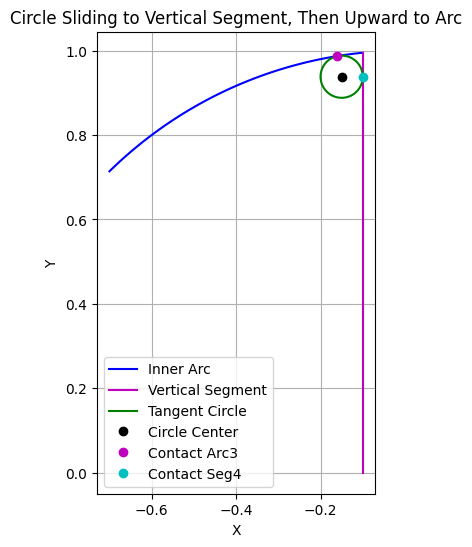

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point
from scipy.optimize import minimize_scalar

# Define geometry
r1 = 1
p3 = (-0.1, np.sqrt(r1**2 - 0.1**2))
p4 = (-0.1, 0)

# Arc3 points
theta_inner = np.linspace(np.arccos(-0.7 / r1), np.arccos(-0.1 / r1), 100)
arc3_pts = np.array([(r1 * np.cos(t), r1 * np.sin(t)) for t in theta_inner])

# Segment seg4
seg4_pts = np.array([p3, p4])
line_seg4 = LineString(seg4_pts)

# Circle radius
R = 0.05

# Step 1: Find x so that the circle at y=0.3 touches the vertical segment
y0 = 0.3

def objective_x(cx):
    center = np.array([cx, y0])
    seg_pt = line_seg4.interpolate(line_seg4.project(Point(center)))
    d = Point(center).distance(seg_pt)
    return abs(d - R)  # should be zero when tangent

res_x = minimize_scalar(objective_x, bounds=(-0.3, 0.3), method='bounded')
x0 = res_x.x

# Step 2: Now slide upward (y direction) to become tangent to the arc
def objective_y(cy):
    center = np.array([x0, cy])
    d_arc = np.min(np.linalg.norm(arc3_pts - center, axis=1))
    return abs(d_arc - R)

res_y = minimize_scalar(objective_y, bounds=(y0, 1.0), method='bounded', options={'xatol': 1e-9})
optimal_y = res_y.x
circle_center = np.array([x0, optimal_y])

# Find tangent points
closest_arc_pt = arc3_pts[np.argmin(np.linalg.norm(arc3_pts - circle_center, axis=1))]
closest_seg_pt = np.array(line_seg4.interpolate(line_seg4.project(Point(circle_center))).coords[0])

# Circle for plot
theta = np.linspace(0, 2*np.pi, 100)
circle_x = circle_center[0] + R * np.cos(theta)
circle_y = circle_center[1] + R * np.sin(theta)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(arc3_pts[:,0], arc3_pts[:,1], 'b-', label="Inner Arc")
ax.plot(seg4_pts[:,0], seg4_pts[:,1], 'm-', label="Vertical Segment")
ax.plot(circle_x, circle_y, 'g-', label="Tangent Circle")
ax.plot(*circle_center, 'ko', label="Circle Center")
ax.plot(*closest_arc_pt, 'mo', label="Contact Arc3")
ax.plot(*closest_seg_pt, 'co', label="Contact Seg4")

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Circle Sliding to Vertical Segment, Then Upward to Arc")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

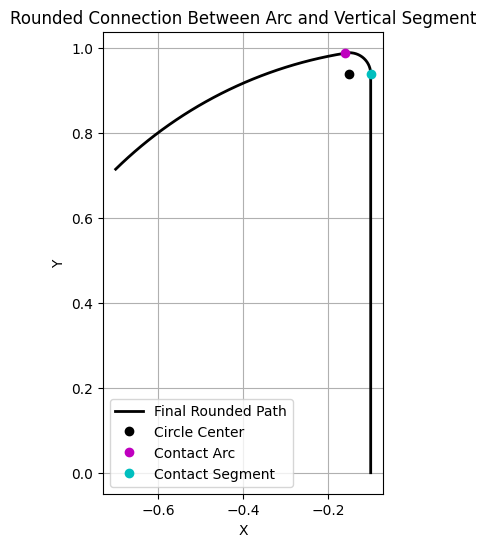

In [ ]:
# Compute angles for the connecting arc from contact point on arc3 to contact point on seg4
# circle_center, closest_arc_pt, closest_seg_pt already known from previous result

# Vectors from center to contact points
vec_start = closest_arc_pt - circle_center
vec_end = closest_seg_pt - circle_center

# Compute angles
angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])

# Ensure counterclockwise direction
if angle_start < angle_end:
    angle_end += 2 * np.pi

# Generate connecting arc points
arc_connection_theta = np.linspace(angle_start, angle_end, 100)
arc_connection = np.array([
    circle_center + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta
])

# Trim arc3 before contact point
distances_arc = np.linalg.norm(arc3_pts - closest_arc_pt, axis=1)
cut_index_arc = np.argmin(distances_arc)
arc3_trimmed = arc3_pts[:cut_index_arc + 1]

# Trim seg4 after contact point
seg_start = closest_seg_pt
seg_end = seg4_pts[1]  # bottom point of the vertical segment

# Combine the final path
final_path = np.vstack([arc3_trimmed, arc_connection, [seg_end]])

# Plot the result
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(final_path[:,0], final_path[:,1], 'k-', linewidth=2, label="Final Rounded Path")
ax.plot(*circle_center, 'ko', label="Circle Center")
ax.plot(*closest_arc_pt, 'mo', label="Contact Arc")
ax.plot(*closest_seg_pt, 'co', label="Contact Segment")

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Rounded Connection Between Arc and Vertical Segment")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

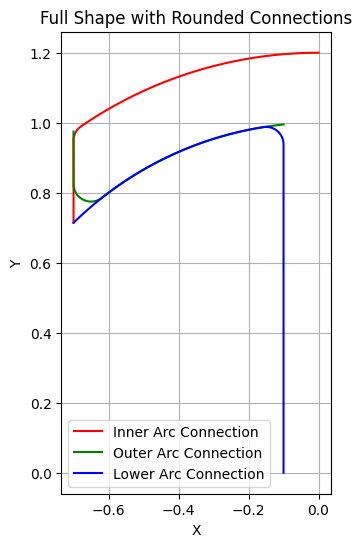

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point
from scipy.optimize import minimize, minimize_scalar

# Parameters
r1, r2 = 1, 1.2
R = 0.05

# Geometry Points
p1 = (-0.7, np.sqrt(r1**2 - 0.7**2))
p2 = (-0.7, np.sqrt(r2**2 - 0.7**2))
p3 = (-0.1, np.sqrt(r1**2 - 0.1**2))
p4 = (-0.1, 0)

# Arcs and segments
theta_outer = np.linspace(np.pi / 2, np.arccos(-0.7 / r2), 100)
arc1_pts = np.array([(r2 * np.cos(t), r2 * np.sin(t)) for t in theta_outer])
seg2_pts = np.array([p2, p1])

theta_inner = np.linspace(np.arccos(-0.7 / r1), np.arccos(-0.1 / r1), 100)
arc3_pts = np.array([(r1 * np.cos(t), r1 * np.sin(t)) for t in theta_inner])
seg4_pts = np.array([p3, p4])

# INNER CORNER
def objective_inner(center):
    dists = []
    dist_seg = Point(center).distance(LineString(seg2_pts))
    dists.append((dist_seg - R)**2)
    d_arc = np.min(np.linalg.norm(arc1_pts - center, axis=1))
    dists.append((d_arc - R)**2)
    origin_dist = np.linalg.norm(center)
    if origin_dist > r2 - R:
        dists.append(10 * (origin_dist - (r2 - R))**2)
    return sum(dists)

res_inner = minimize(objective_inner, [-0.7 + R, 1.0], method='Nelder-Mead')
circle_center_inner = res_inner.x
closest_arc_pt_inner = arc1_pts[np.argmin(np.linalg.norm(arc1_pts - circle_center_inner, axis=1))]
closest_seg_pt_inner = np.array(LineString(seg2_pts).interpolate(LineString(seg2_pts).project(Point(circle_center_inner))).coords[0])

vec_start = closest_arc_pt_inner - circle_center_inner
vec_end = closest_seg_pt_inner - circle_center_inner
angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])
if angle_end < angle_start: angle_end += 2 * np.pi
arc_connection_theta = np.linspace(angle_start, angle_end, 100)
arc_connection_inner = np.array([circle_center_inner + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta])

arc1_trimmed = arc1_pts[:np.argmin(np.linalg.norm(arc1_pts - closest_arc_pt_inner, axis=1)) + 1]
final_path_inner = np.vstack([arc1_trimmed, arc_connection_inner, [seg2_pts[1]]])

# OUTER CORNER
def objective_outer(center):
    dists = []
    dist_seg = Point(center).distance(LineString(seg2_pts))
    dists.append((dist_seg - R)**2)
    d_arc = np.min(np.linalg.norm(arc3_pts - center, axis=1))
    dists.append((d_arc - R)**2)
    origin_dist = np.linalg.norm(center)
    if origin_dist < r1 + R:
        dists.append(1000 * (r1 + R - origin_dist)**2)
    return sum(dists)

res_outer = minimize(objective_outer, [-0.65, 0.8], method='Nelder-Mead')
circle_center_outer = res_outer.x
closest_arc3_pt = arc3_pts[np.argmin(np.linalg.norm(arc3_pts - circle_center_outer, axis=1))]
closest_seg2_pt = np.array(LineString(seg2_pts).interpolate(LineString(seg2_pts).project(Point(circle_center_outer))).coords[0])

vec_start = closest_seg2_pt - circle_center_outer
vec_end = closest_arc3_pt - circle_center_outer
angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])
if angle_end < angle_start: angle_start -= 2 * np.pi
arc_connection_theta = np.linspace(angle_end, angle_start, 100)
arc_connection_outer = np.array([circle_center_outer + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta])[::-1]

arc3_trimmed = arc3_pts[np.argmin(np.linalg.norm(arc3_pts - closest_arc3_pt, axis=1)):]
seg2_trimmed = [seg2_pts[0], closest_seg2_pt]
final_path_outer = np.vstack([seg2_trimmed, arc_connection_outer, arc3_trimmed])


# LOWER CORNER
line_seg4 = LineString(seg4_pts)

def objective_x(cx):
    return abs(Point([cx, 0.3]).distance(line_seg4.interpolate(line_seg4.project(Point([cx, 0.3])))) - R)

res_x = minimize_scalar(objective_x, bounds=(-0.3, 0.3), method='bounded')
x0 = res_x.x

def objective_y(cy):
    center = np.array([x0, cy])
    return abs(np.min(np.linalg.norm(arc3_pts - center, axis=1)) - R)

res_y = minimize_scalar(objective_y, bounds=(0.3, 1.0), method='bounded')
circle_center_low = np.array([x0, res_y.x])

closest_arc_low = arc3_pts[np.argmin(np.linalg.norm(arc3_pts - circle_center_low, axis=1))]
closest_seg_low = np.array(line_seg4.interpolate(line_seg4.project(Point(circle_center_low))).coords[0])

vec_start = closest_arc_low - circle_center_low
vec_end = closest_seg_low - circle_center_low
angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])
if angle_start < angle_end: angle_end += 2 * np.pi
arc_connection_theta = np.linspace(angle_start, angle_end, 100)
arc_connection_low = np.array([circle_center_low + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta])

arc3_trimmed_low = arc3_pts[:np.argmin(np.linalg.norm(arc3_pts - closest_arc_low, axis=1)) + 1]
final_path_low = np.vstack([arc3_trimmed_low, arc_connection_low, [seg4_pts[1]]])

# Plot all segments
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(final_path_inner[:, 0], final_path_inner[:, 1], 'r-', label="Inner Arc Connection")
ax.plot(final_path_outer[:, 0], final_path_outer[:, 1], 'g-', label="Outer Arc Connection")
ax.plot(final_path_low[:, 0], final_path_low[:, 1], 'b-', label="Lower Arc Connection")

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Full Shape with Rounded Connections")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:

# Plot all segments
arc3_trimmed = arc3_pts[np.argmin(np.linalg.norm(arc3_pts - closest_arc3_pt, axis=1)):]
arc3_trimmed_low = arc3_trimmed[:np.argmin(np.linalg.norm(arc3_trimmed - closest_arc_low, axis=1)) + 1]
final_path_inner = np.vstack([arc1_trimmed, arc_connection_inner, [arc_connection_outer[1]], arc_connection_outer[2:], arc3_trimmed_low, arc_connection_low,  [seg4_pts[1]]])

# Function to reflect points across a line at 150° through the origin
def reflect(points, angle_deg):
    theta = np.radians(angle_deg)
    d = np.array([np.cos(theta), np.sin(theta)])  # unit direction vector
    # Reflect each point
    reflected = []
    for p in points:
        proj = 2 * np.dot(p, d) * d
        reflected.append(proj - p)
    return np.array(reflected)

# Reflect all segments
final_path_inner_r = reflect( final_path_inner.T , 150)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(final_path_inner[:, 0], final_path_inner[:, 1], 'r-', label="Inner Arc Connection")
ax.plot(final_path_inner_r[:, 0], final_path_inner[:, 1], 'r-', label="Inner Arc Connection")


ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Full Shape with Rounded Connections")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

ValueError: shapes (471,) and (2,) not aligned: 471 (dim 0) != 2 (dim 0)

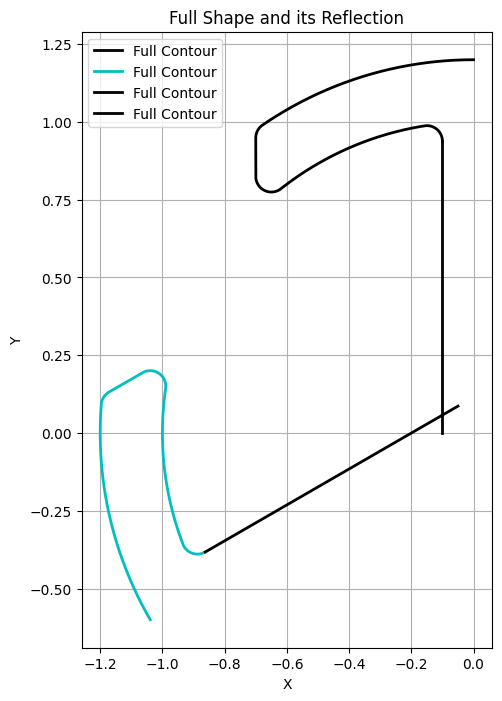

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point
from scipy.optimize import minimize, minimize_scalar

# Parameters
r1, r2 = 1, 1.2
R = 0.05

# Geometry Points
p1 = (-0.7, np.sqrt(r1**2 - 0.7**2))
p2 = (-0.7, np.sqrt(r2**2 - 0.7**2))
p3 = (-0.1, np.sqrt(r1**2 - 0.1**2))
p4 = (-0.1, 0)

# Arcs and segments
theta_outer = np.linspace(np.pi / 2, np.arccos(-0.7 / r2), 100)
arc1_pts = np.array([(r2 * np.cos(t), r2 * np.sin(t)) for t in theta_outer])
seg2_pts = np.array([p2, p1])

theta_inner = np.linspace(np.arccos(-0.7 / r1), np.arccos(-0.1 / r1), 100)
arc3_pts = np.array([(r1 * np.cos(t), r1 * np.sin(t)) for t in theta_inner])
seg4_pts = np.array([p3, p4])

# INNER CORNER
def objective_inner(center):
    dists = []
    dist_seg = Point(center).distance(LineString(seg2_pts))
    dists.append((dist_seg - R)**2)
    d_arc = np.min(np.linalg.norm(arc1_pts - center, axis=1))
    dists.append((d_arc - R)**2)
    origin_dist = np.linalg.norm(center)
    if origin_dist > r2 - R:
        dists.append(10 * (origin_dist - (r2 - R))**2)
    return sum(dists)

res_inner = minimize(objective_inner, [-0.7 + R, 1.0], method='Nelder-Mead')
circle_center_inner = res_inner.x
closest_arc_pt_inner = arc1_pts[np.argmin(np.linalg.norm(arc1_pts - circle_center_inner, axis=1))]
closest_seg_pt_inner = np.array(LineString(seg2_pts).interpolate(LineString(seg2_pts).project(Point(circle_center_inner))).coords[0])

vec_start = closest_arc_pt_inner - circle_center_inner
vec_end = closest_seg_pt_inner - circle_center_inner
angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])
if angle_end < angle_start: angle_end += 2 * np.pi
arc_connection_theta = np.linspace(angle_start, angle_end, 100)
arc_connection_inner = np.array([circle_center_inner + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta])

arc1_trimmed = arc1_pts[:np.argmin(np.linalg.norm(arc1_pts - closest_arc_pt_inner, axis=1)) + 1]
final_path_inner = np.vstack([arc1_trimmed, arc_connection_inner, [seg2_pts[1]]])

# OUTER CORNER
def objective_outer(center):
    dists = []
    dist_seg = Point(center).distance(LineString(seg2_pts))
    dists.append((dist_seg - R)**2)
    d_arc = np.min(np.linalg.norm(arc3_pts - center, axis=1))
    dists.append((d_arc - R)**2)
    origin_dist = np.linalg.norm(center)
    if origin_dist < r1 + R:
        dists.append(1000 * (r1 + R - origin_dist)**2)
    return sum(dists)

res_outer = minimize(objective_outer, [-0.65, 0.8], method='Nelder-Mead')
circle_center_outer = res_outer.x
closest_arc3_pt = arc3_pts[np.argmin(np.linalg.norm(arc3_pts - circle_center_outer, axis=1))]
closest_seg2_pt = np.array(LineString(seg2_pts).interpolate(LineString(seg2_pts).project(Point(circle_center_outer))).coords[0])

vec_start = closest_seg2_pt - circle_center_outer
vec_end = closest_arc3_pt - circle_center_outer
angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])
if angle_end < angle_start: angle_start -= 2 * np.pi
arc_connection_theta = np.linspace(angle_end, angle_start, 100)
arc_connection_outer = np.array([circle_center_outer + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta])[::-1]

arc3_trimmed = arc3_pts[np.argmin(np.linalg.norm(arc3_pts - closest_arc3_pt, axis=1)):]
seg2_trimmed = [seg2_pts[0], closest_seg2_pt]
final_path_outer = np.vstack([seg2_trimmed, arc_connection_outer, arc3_trimmed])


# LOWER CORNER
line_seg4 = LineString(seg4_pts)

def objective_x(cx):
    return abs(Point([cx, 0.3]).distance(line_seg4.interpolate(line_seg4.project(Point([cx, 0.3])))) - R)

res_x = minimize_scalar(objective_x, bounds=(-0.3, 0.3), method='bounded')
x0 = res_x.x

def objective_y(cy):
    center = np.array([x0, cy])
    return abs(np.min(np.linalg.norm(arc3_pts - center, axis=1)) - R)

res_y = minimize_scalar(objective_y, bounds=(0.3, 1.0), method='bounded')
circle_center_low = np.array([x0, res_y.x])

closest_arc_low = arc3_pts[np.argmin(np.linalg.norm(arc3_pts - circle_center_low, axis=1))]
closest_seg_low = np.array(line_seg4.interpolate(line_seg4.project(Point(circle_center_low))).coords[0])

vec_start = closest_arc_low - circle_center_low
vec_end = closest_seg_low - circle_center_low
angle_start = np.arctan2(vec_start[1], vec_start[0])
angle_end = np.arctan2(vec_end[1], vec_end[0])
if angle_start < angle_end: angle_end += 2 * np.pi
arc_connection_theta = np.linspace(angle_start, angle_end, 100)
arc_connection_low = np.array([circle_center_low + R * np.array([np.cos(a), np.sin(a)]) for a in arc_connection_theta])

arc3_trimmed_low = arc3_pts[:np.argmin(np.linalg.norm(arc3_pts - closest_arc_low, axis=1)) + 1]
final_path_low = np.vstack([arc3_trimmed_low, arc_connection_low, [seg4_pts[1]]])

# Function to reflect points across a line through the origin
def reflect(points, angle_deg):
    theta = np.radians(angle_deg)
    # The line direction vector (rotated from x-axis)
    line_dir = np.array([np.cos(theta), np.sin(theta)])

    # Rotation matrix to align the line with the x-axis
    cos_theta = np.cos(-theta)
    sin_theta = np.sin(-theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta],
                                [sin_theta, cos_theta]])

    # Rotation matrix to rotate back
    cos_theta_inv = np.cos(theta)
    sin_theta_inv = np.sin(theta)
    rotation_matrix_inv = np.array([[cos_theta_inv, -sin_theta_inv],
                                    [sin_theta_inv, cos_theta_inv]])

    # Apply transformation to each point
    reflected_points = []
    for p in points:
        # 1. Translate so line passes through origin (already is)
        # 2. Rotate line to x-axis
        p_rotated = rotation_matrix @ p
        # 3. Reflect across x-axis (flip y-coordinate)
        p_reflected_rotated = np.array([p_rotated[0], -p_rotated[1]])
        # 4. Rotate back
        p_reflected = rotation_matrix_inv @ p_reflected_rotated
        reflected_points.append(p_reflected)

    return np.array(reflected_points)

# Reconstruct based on the logic above
index_of_closest_arc_pt_inner = np.argmin(np.linalg.norm(arc1_pts - closest_arc_pt_inner, axis=1))
arc1_start_to_inner_contact = arc1_pts[:index_of_closest_arc_pt_inner + 1]

seg_inner_to_outer = np.array([closest_seg_pt_inner, closest_seg2_pt])

index_of_closest_arc3_outer = np.argmin(np.linalg.norm(arc3_pts - closest_arc3_pt, axis=1))
index_of_closest_arc3_low = np.argmin(np.linalg.norm(arc3_pts - closest_arc_low, axis=1))
arc3_outer_to_lower_contact = arc3_pts[index_of_closest_arc3_outer : index_of_closest_arc3_low + 1]

seg4_to_end = np.array([closest_seg_low, seg4_pts[1]])


# Combine all the segments in order
full_contour = np.vstack([
    arc1_start_to_inner_contact,
    arc_connection_inner[1:],  # Start from the second point to avoid duplication
    seg_inner_to_outer[1:],    # Start from the second point to avoid duplication
    arc_connection_outer[1:],  # Start from the second point
    arc3_outer_to_lower_contact[1:], # Start from the second point
    arc_connection_low[1:],    # Start from the second point
    # seg4_to_end[1:]            # Start from the second point
])

# Reflect the full contour
full_contour_reflected = reflect(full_contour, 150)
seg4 = seg4_to_end
seg4_r = reflect(seg4, 150)

fig, ax = plt.subplots(figsize=(8, 8)) # Increased figure size for better visualization

# Plot the reflected contour
ax.plot(full_contour[:, 0], full_contour[:, 1], 'k-', linewidth=2, label="Full Contour")
ax.plot(full_contour_reflected[:, 0], full_contour_reflected[:, 1], 'c-', linewidth=2, label="Full Contour")

ax.plot(seg4[:, 0], seg4[:, 1], 'k-', linewidth=2, label="Full Contour")
ax.plot(seg4_r[:, 0], seg4_r[:, 1], 'k-', linewidth=2, label="Full Contour")


ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Full Shape and its Reflection")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

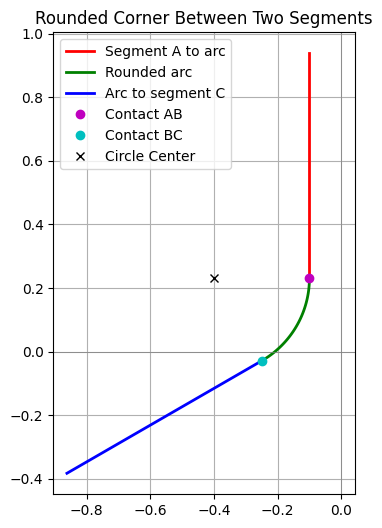

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

point_A = seg4_r[1]
point_B = seg4_r[0]
x1, y1 = point_A
x2, y2 = point_B

common_corner_x = seg4[0][0]  # x-coordinate where you want to find y

# Compute slope (m) and intercept (b) for the line y = m * x + b
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# Evaluate y at common_corner_x
y_at_common_corner_x = m * common_corner_x + b
common_corner = np.array([common_corner_x, y_at_common_corner_x])

# Optional example points (you must define pt1 and pt3 elsewhere if used)
pt1 = seg4[0]  # Start of reflected segment
pt3 = seg4_r[0]  # End of reflected segment

# Example points (replace with actual values)
A = pt1  # Start point of first segment
B = common_corner  # Corner point (joint)
C = pt3  # End point of second segment

# Compute unit vectors from B to A and B to C
u = (A - B)
v = (C - B)

if np.linalg.norm(u) == 0 or np.linalg.norm(v) == 0:
    raise ValueError("Degenerate segment: zero length.")

u = u / np.linalg.norm(u)
v = v / np.linalg.norm(v)

# Radius of the circle
R = 0.3

# Angle between u and v
dot = np.clip(np.dot(u, v), -1.0, 1.0)  # Clip for numerical stability
theta = np.arccos(dot) / 2

# Bisector direction
bisector = u + v
if np.linalg.norm(bisector) == 0:
    raise ValueError("Angle is 180°, cannot compute bisector.")
bisector /= np.linalg.norm(bisector)

# Distance from corner to arc center
d = R / np.sin(theta)
circle_center = B + d * bisector

# Normals to get tangent contact points
normal_to_AB = np.array([-u[1], u[0]])
normal_to_BC = np.array([v[1], -v[0]])

contact_AB = circle_center + R * (-normal_to_AB)  # Toward segment A
contact_BC = circle_center + R * (-normal_to_BC)  # Toward segment C

# Compute angles for arc
angle1 = np.arctan2(*(contact_AB - circle_center)[::-1])
angle2 = np.arctan2(*(contact_BC - circle_center)[::-1])

# Ensure counter-clockwise arc
if angle1 < angle2:
    angle2 += 2 * np.pi

arc_angles = np.linspace(angle2, angle1, 100)
arc_x = circle_center[0] + R * np.cos(arc_angles)
arc_y = circle_center[1] + R * np.sin(arc_angles)

# Plot the result
plt.figure(figsize=(6, 6))
plt.plot([A[0], contact_AB[0]], [A[1], contact_AB[1]], 'r-', linewidth=2, label='Segment A to arc')
plt.plot(arc_x, arc_y, 'g-', linewidth=2, label='Rounded arc')
plt.plot([contact_BC[0], C[0]], [contact_BC[1], C[1]], 'b-', linewidth=2, label='Arc to segment C')

# Optional points
plt.plot(*contact_AB, 'mo', label='Contact AB')
plt.plot(*contact_BC, 'co', label='Contact BC')
plt.plot(*circle_center, 'kx', label='Circle Center')

plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title("Rounded Corner Between Two Segments")
plt.legend()
plt.show()

In [ ]:
len(arc_x)

100

In [ ]:


# Correct the creation of the NumPy array
joint1 = np.zeros((2, 2))
joint1[0] = seg4[0]
joint1[1] = [contact_AB[0], contact_AB[1]]

# Correct the creation of the NumPy array
joint2 = np.zeros((2, 2))
joint2[1] = [contact_BC[0], contact_BC[1]]
joint2[0] = seg4_r[0] # Corrected index based on intended usage in plot below


# Correct the creation of the NumPy array
joint1 = np.zeros((2, 2))
joint1[0] = seg4[0]
joint1[1] = [contact_AB[0], contact_AB[1]]

# Correct the creation of the NumPy array
joint2 = np.zeros((2, 2))
joint2[0] = [contact_BC[0], contact_BC[1]]
joint2[1] = seg4_r[0] # Corrected index based on intended usage in plot below

# Fix this - This line is a comment and does not require fixing

# Combine arc_x and arc_y into a single NumPy array for plotting
arc_joint = np.vstack([arc_x, arc_y]).T
arc_joint_flipped = arc_joint[::-1]

finale1 = np.vstack([joint1, arc_joint_flipped , joint2])
finalee = np.stack([full_contour, finale1, full_contour_reflected])


fig, ax = plt.subplots(figsize=(8, 8)) # Increased figure size for better visualization

# ax.plot(joint1[:, 0], joint1[:, 1], 'k-', linewidth=2, label="Segment 1") # Added specific labels
# ax.plot(joint2[:, 0], joint2[:, 1], 'r-', linewidth=2, label="Segment 2") # Added specific labels and different color
# ax.plot(arc_joint[:, 0], arc_joint[:, 1], 'r-', linewidth=2, label="Segment 2") # Added specific labels and different color

ax.plot(finalee[:, 0], finalee[:, 1], 'k-', linewidth=2, label="Segment 2") # Added specific labels and different color

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Segments for Rounding") # More descriptive title
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

ValueError: all input arrays must have the same shape

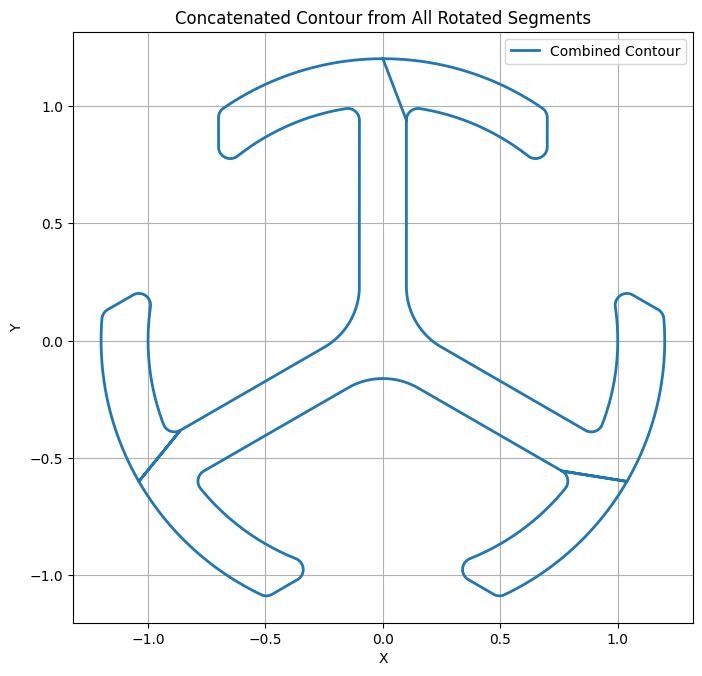

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rotation function
def rotate(points, angle_deg, center=(0, 0)):
    angle_rad = np.radians(angle_deg)
    R = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    return (points - center) @ R.T + center

# Build the rounded segment
joint1 = np.zeros((2, 2))
joint1[0] = seg4[0]
joint1[1] = [contact_AB[0], contact_AB[1]]

joint2 = np.zeros((2, 2))
joint2[0] = [contact_BC[0], contact_BC[1]]
joint2[1] = seg4_r[0]

arc_joint = np.vstack([arc_x, arc_y]).T
arc_joint_flipped = arc_joint[::-1]

finale1 = np.vstack([joint1, arc_joint_flipped, joint2])

# All base shapes
base_paths = [full_contour, finale1, full_contour_reflected]

# Create one single concatenated contour
joined_contour = []

for angle in [0, 120, 240]:
    for path in base_paths:
        rotated_path = rotate(path, angle, center=(0, 0))
        joined_contour.append(rotated_path)

# Stack all into one array
joined_contour = np.vstack(joined_contour)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(joined_contour[:, 0], joined_contour[:, 1], '-', linewidth=2, label="Combined Contour")

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Concatenated Contour from All Rotated Segments")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

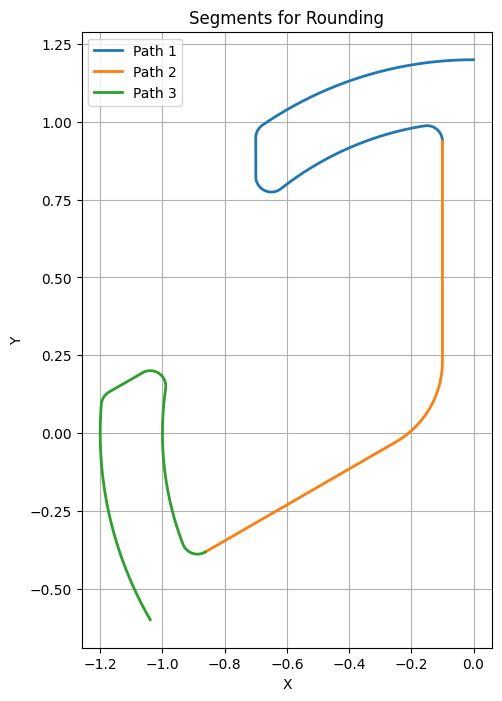

In [ ]:
# Correct the creation of the NumPy array
joint1 = np.zeros((2, 2))
joint1[0] = seg4[0]
joint1[1] = [contact_AB[0], contact_AB[1]]

# Correct the creation of the NumPy array
joint2 = np.zeros((2, 2))
joint2[1] = [contact_BC[0], contact_BC[1]]
joint2[0] = seg4_r[0] # Corrected index based on intended usage in plot below


# Correct the creation of the NumPy array
joint1 = np.zeros((2, 2))
joint1[0] = seg4[0]
joint1[1] = [contact_AB[0], contact_AB[1]]

# Correct the creation of the NumPy array
joint2 = np.zeros((2, 2))
joint2[0] = [contact_BC[0], contact_BC[1]]
joint2[1] = seg4_r[0] # Corrected index based on intended usage in plot below

# Fix this - This line is a comment and does not require fixing

# Combine arc_x and arc_y into a single NumPy array for plotting
arc_joint = np.vstack([arc_x, arc_y]).T
arc_joint_flipped = arc_joint[::-1]

# Combine segments using vstack, which concatenates vertically
# Ensure all parts being stacked are numpy arrays
finale1 = np.vstack([joint1, arc_joint_flipped , joint2])

# To plot multiple separate paths, put them in a list and iterate,
# or plot them individually. Stacking paths with different lengths
# into a single array is usually only done if they form one contiguous path.
# Given the reflection, it's likely these are separate path components.
# Let's create a list of the paths/segments you want to plot.
paths_to_plot = [
    full_contour,
    finale1,              # This segment is the rounded corner from the other calculation
    full_contour_reflected
]


fig, ax = plt.subplots(figsize=(8, 8)) # Increased figure size for better visualization

# Iterate through the list of paths and plot each one
for i, path in enumerate(paths_to_plot):
    ax.plot(path[:, 0], path[:, 1], '-', linewidth=2, label=f"Path {i+1}") # Added specific labels

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("Segments for Rounding") # More descriptive title
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

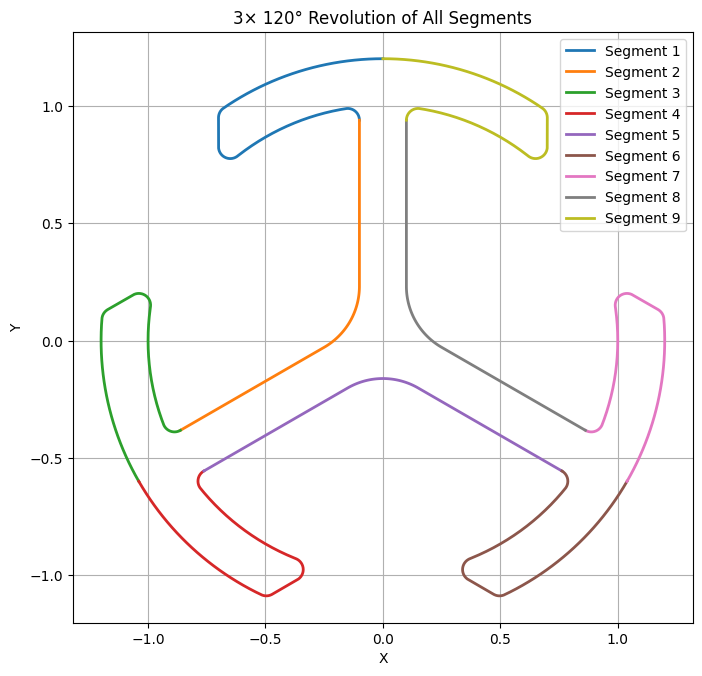

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rotation function
def rotate(points, angle_deg, center=(0, 0)):
    angle_rad = np.radians(angle_deg)
    R = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    return (points - center) @ R.T + center

# Build the rounded segment
joint1 = np.zeros((2, 2))
joint1[0] = seg4[0]
joint1[1] = [contact_AB[0], contact_AB[1]]

joint2 = np.zeros((2, 2))
joint2[0] = [contact_BC[0], contact_BC[1]]
joint2[1] = seg4_r[0]

arc_joint = np.vstack([arc_x, arc_y]).T
arc_joint_flipped = arc_joint[::-1]

finale1 = np.vstack([joint1, arc_joint_flipped, joint2])

# Initialize all paths (will include rotated copies)
base_paths = [full_contour, finale1, full_contour_reflected]
paths_to_plot = []

# For each rotation (0°, 120°, 240°), rotate each base path
for angle in [0, 120, 240]:
    for path in base_paths:
        rotated_path = rotate(path, angle, center=(0, 0))  # you can change center if needed
        paths_to_plot.append(rotated_path)


# Plot everything
fig, ax = plt.subplots(figsize=(8, 8))

for i, path in enumerate(paths_to_plot):
    ax.plot(path[:, 0], path[:, 1], '-', linewidth=2, label=f"Segment {i+1}")

# ax.plot(path_total[:, 0], path_total[:, 1], 'k-', linewidth=2, label="Segment 2") # Added specific labels and different color

ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title("3× 120° Revolution of All Segments")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()